[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/work/blob/master/Pandas_Datareader_VOO_Technical%20Analysis.ipynb)

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as plt

In [0]:
!pip install -q pandas_datareader
import pandas_datareader as web
#install package each time - can't call pandas directly


In [0]:
start = datetime.datetime(2013, 1, 1)

In [0]:
end = datetime.datetime(2018, 10, 1)

In [0]:
sp500 = web.DataReader('VOO', 'iex', start, end)


In [54]:
sp500.head(3)

,open,high,low,close,volume
date,,,,,
2013-10-02,139.5586,140.3008,139.1603,140.2827,1253621
2013-10-03,139.9388,140.0474,138.3457,139.0336,1447710
2013-10-04,139.1060,140.1741,138.9250,140.0474,538464


In [55]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2013-10-02 to 2018-10-01
Data columns (total 5 columns):
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0+ KB


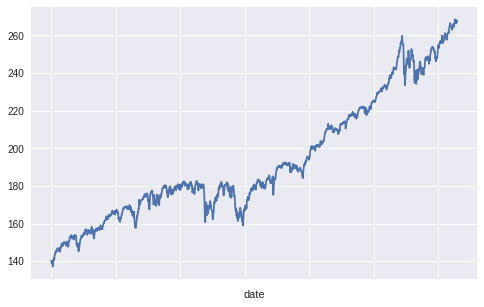

In [60]:
sp500['close'].plot(grid=True, figsize=(8, 5))

In [69]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['close'], window=42), 2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['close'], window=252), 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  


In [70]:
sp500[['close', '42d', '252d']].tail()

,close,42d,252d
date,,,
2018-09-25,267.1233,262.62,246.62
2018-09-26,266.3400,262.83,246.78
2018-09-27,267.0800,263.09,246.95
2018-09-28,267.0500,263.33,247.11
2018-10-01,268.0400,263.59,247.28


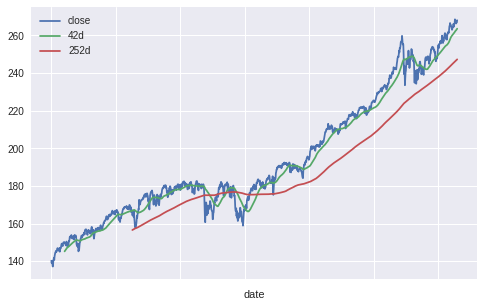

In [73]:
sp500[['close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [74]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

date
2018-09-25    16.00
2018-09-26    16.05
2018-09-27    16.14
2018-09-28    16.22
2018-10-01    16.31
Name: 42-252, dtype: float64

In [75]:
sp500['42-252'].head()

date
2013-10-02   NaN
2013-10-03   NaN
2013-10-04   NaN
2013-10-07   NaN
2013-10-08   NaN
Name: 42-252, dtype: float64

In [107]:
SD = 1
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    881
 0    275
-1    103
Name: Regime, dtype: int64

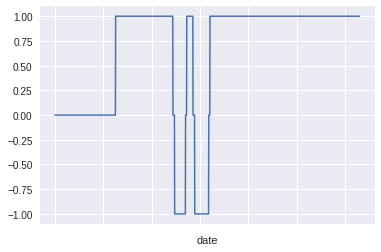

In [108]:
sp500['Regime'].plot(lw=1.5)

In [0]:
sp500['Market'] = np.log(sp500['close'] / sp500['close'].shift(1))

In [0]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

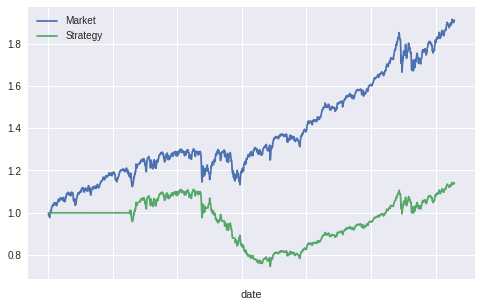

In [113]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8, 5))
#this is far worse then what the Python book shows

In [92]:
sp500[.head(2)]

,open,high,low,close,volume,42d,252d,42-252,Regime,Market,Strategy
date,,,,,,,,,,,
2013-10-02,139.5586,140.3008,139.1603,140.2827,1253621,NaN,NaN,NaN,0,NaN,NaN
2013-10-03,139.9388,140.0474,138.3457,139.0336,1447710,NaN,NaN,NaN,0,-0.008944,-0.0
